In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv("Hate-2001-2019-0.csv")
#Fill empty values with None for Weapon Type and clean up typos in dataset
df['WeaponType'].fillna('None',inplace = True)
df['WeaponType'].replace('Other ( bottle, rocks, spitting)', 'Other (bottle, rocks, spitting)', inplace=True)
df['WeaponType'].replace('Firearm (unknown whether handgun, rifle or shotgun', 'Firearm (unknown whether handgun, rifle or shotgun)', inplace=True)

#Replace rest of NaN values with 'Unknown'
df_new = df.replace(np.nan, 'Unknown', regex=True)

#rearrange columns to be more easily readable
columns_titles = ['MostSeriousBias','MostSeriousBiasType','TotalNumberOfVictims','MostSeriousVictimType','TotalNumberOfSuspects','SuspectsRaceAsAGroup','MostSeriousUcr','MostSeriousUcrType','WeaponType','Offensive_Act','MostSeriousLocation','County','NCIC','ClosedYear','MonthOccurrence']
df_new=df_new.reindex(columns=columns_titles)

#One hot encode all necessary columns
df_new = pd.concat([df_new,pd.get_dummies(df_new['MostSeriousBiasType'], prefix='BiasType')],axis=1)
df_new.drop(['MostSeriousBiasType'],axis=1, inplace=True)
TotalNumberOfVictims = df_new['TotalNumberOfVictims']
df_new.drop(['TotalNumberOfVictims'],axis=1, inplace=True)
df_new = pd.concat([df_new,TotalNumberOfVictims],axis=1)
df_new = pd.concat([df_new,pd.get_dummies(df_new['MostSeriousVictimType'], prefix='VictimType')],axis=1)
df_new.drop(['MostSeriousVictimType'],axis=1, inplace=True)
TotalNumberOfSuspects = df_new['TotalNumberOfSuspects']
df_new.drop(['TotalNumberOfSuspects'],axis=1, inplace=True)
df_new = pd.concat([df_new,TotalNumberOfSuspects],axis=1)
df_new = pd.concat([df_new,pd.get_dummies(df_new['SuspectsRaceAsAGroup'], prefix='SuspectsRace')],axis=1)
df_new.drop(['SuspectsRaceAsAGroup'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['MostSeriousUcr'], prefix='Ucr')],axis=1)
df_new.drop(['MostSeriousUcr'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['MostSeriousUcrType'], prefix='UcrType')],axis=1)
df_new.drop(['MostSeriousUcrType'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['WeaponType'], prefix='Weapon')],axis=1)
df_new.drop(['WeaponType'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['Offensive_Act'], prefix='Offense')],axis=1)
df_new.drop(['Offensive_Act'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['MostSeriousLocation'], prefix='Location')],axis=1)
df_new.drop(['MostSeriousLocation'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['County'], prefix='County')],axis=1)
df_new.drop(['County'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['NCIC'], prefix='Agency')],axis=1)
df_new.drop(['NCIC'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['ClosedYear'], prefix='Year')],axis=1)
df_new.drop(['ClosedYear'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['MonthOccurrence'], prefix='Month')],axis=1)
df_new.drop(['MonthOccurrence'],axis=1, inplace=True)

In [9]:
df

,RecordId,ClosedYear,MonthOccurrence,County,NCIC,TotalNumberOfVictims,TotalNumberOfIndividualVictims,SuspectsRaceAsAGroup,TotalNumberOfSuspects,MostSeriousUcr,MostSeriousUcrType,MostSeriousLocation,MostSeriousBias,MostSeriousBiasType,MostSeriousVictimType,WeaponType,Offensive_Act,IsMultipleBias,TotalNumberOfIndividualVictimsAdult,TotalNumberOfIndividualVictimsJuvenile,TotalNumberOfSuspectsAdult,TotalNumberOfSuspectsJuvenile,SuspectsEthnicityAsAGroup
0,CA01-0000000001,2001,2,1,100,1,1,White,2,Simple Assault,Violent Crimes,Bar/Night Club,Anti-Black or African American,Race/Ethnicity/Ancestry,Person,"Personal weapons (hands, feet, teeth, etc.)",Verbal slurs,NaN,NaN,NaN,NaN,NaN,NaN
1,CA01-0000000005,2001,2,1,100,2,2,White,1,Destruction/Damage/Vandalism,Property Crimes,Residence/Home/Driveway,Anti-Black or African American,Race/Ethnicity/Ancestry,Person,None,Graffiti,NaN,NaN,NaN,NaN,NaN,NaN
2,CA01-0000000003,2001,5,1,100,1,1,White,4,Destruction/Damage/Vandalism,Property Crimes,Residence/Home/Driveway,Anti-Hispanic or Latino,Race/Ethnicity/Ancestry,Person,None,Daubing of swastika,NaN,NaN,NaN,NaN,NaN,NaN
3,CA01-0000000002,2001,9,1,100,1,1,White,1,Intimidation,Violent Crimes,Residence/Home/Driveway,Anti-Hispanic or Latino,Race/Ethnicity/Ancestry,Person,None,Verbal slurs,NaN,NaN,NaN,NaN,NaN,NaN
4,CA01-0000000004,2001,9,1,100,2,2,White,1,Intimidation,Violent Crimes,Convenience Store,Anti-Other Race/Ethnicity/Ancestry,Race/Ethnicity/Ancestry,Person,None,Verbal slurs,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23101,CA00-0000033805,2019,1,37,3715,1,1,Unknown,1,Intimidation,Violent Crimes,Air/Bus/Train Terminal,Anti-Citizenship Status,Race/Ethnicity/Ancestry,Person,Unknown,Annoying telephone calls/fax,NaN,1.0,0.0,1.0,0.0,Unknown
23102,CA00-0000033806,2019,7,37,3715,1,1,Black or African American,1,Simple Assault,Violent Crimes,Air/Bus/Train Terminal,Anti-Citizenship Status,Race/Ethnicity/Ancestry,Person,"Personal weapons (hands, feet, teeth, etc.)",Verbal slurs,NaN,1.0,0.0,1.0,0.0,NaN
23103,CA00-0000033807,2019,8,37,3715,1,1,Unknown,1,Destruction/Damage/Vandalism,Property Crimes,Parking Lot/Garage,Anti-Citizenship Status,Race/Ethnicity/Ancestry,Person,Unknown,Unknown,NaN,1.0,0.0,1.0,0.0,NaN
23104,CA00-0000033808,2019,9,37,3715,1,1,Unknown,1,Destruction/Damage/Vandalism,Property Crimes,Highway/Road/Alley/Street,Anti-Citizenship Status,Race/Ethnicity/Ancestry,Person,Unknown,Damage to vehicle,NaN,1.0,0.0,1.0,0.0,NaN


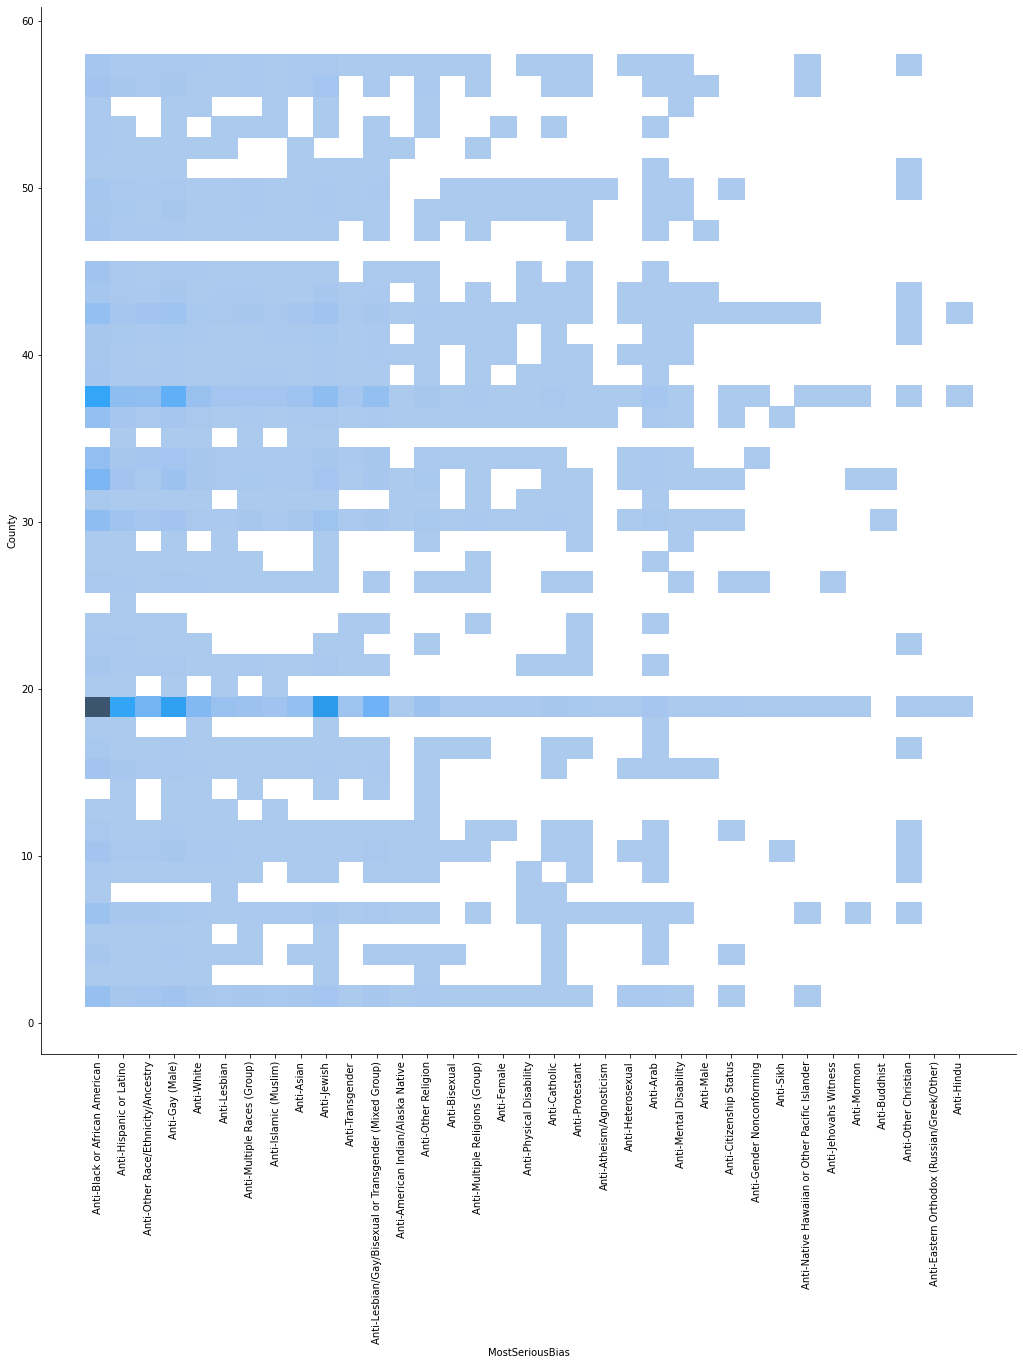

In [47]:
ax = sns.displot(x = 'MostSeriousBias', y = 'County', data=df,height=15.27, aspect=14.7/15.27)
ax.set_xticklabels(rotation=90)

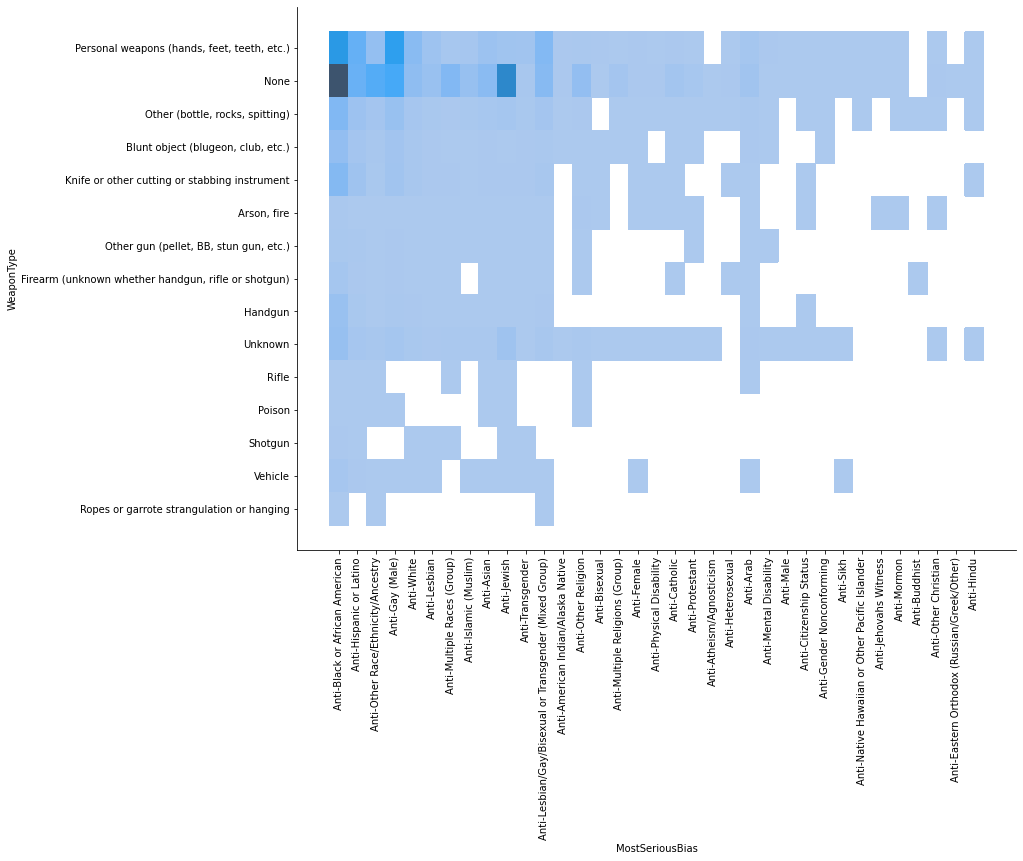

In [33]:
ax = sns.displot(x = 'MostSeriousBias', y = 'WeaponType', data=df,height=8.27, aspect=14.7/8.27)
ax.set_xticklabels(rotation=90)

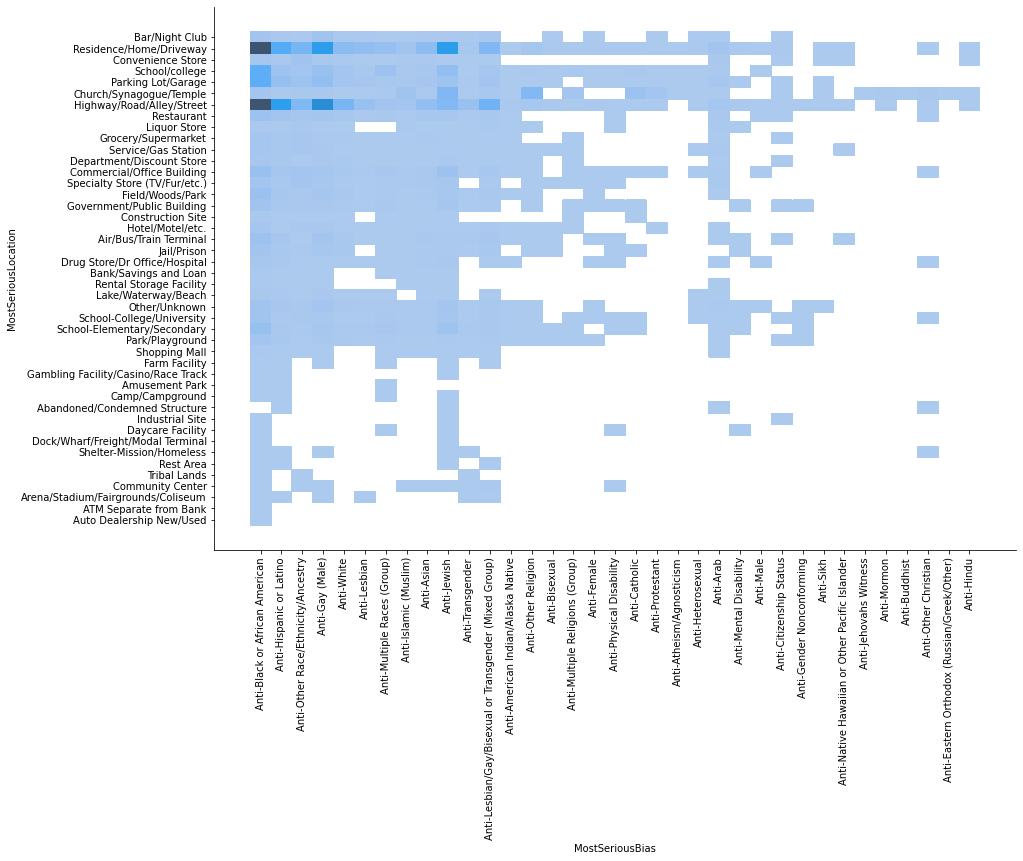

In [31]:
ax = sns.displot(x = 'MostSeriousBias', y = 'MostSeriousLocation', data=df,height=8.27, aspect=14.7/8.27)
ax.set_xticklabels(rotation=90)

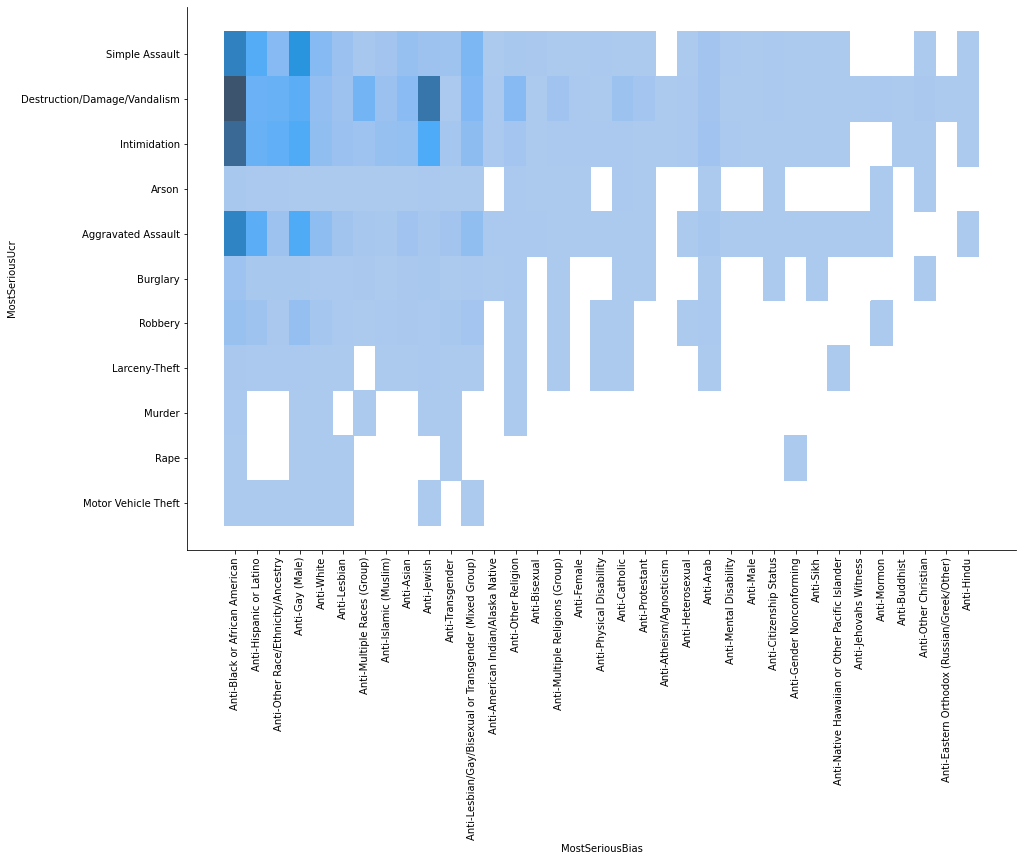

In [38]:
ax = sns.displot(x = 'MostSeriousBias', y = 'MostSeriousUcr', data=df,height=8.27, aspect=14.7/8.27)
ax.set_xticklabels(rotation=90)